<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-Categorical-Data" data-toc-modified-id="Clustering-Categorical-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Map-the-data" data-toc-modified-id="Map-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Map the data</a></span></li><li><span><a href="#Select-the-features" data-toc-modified-id="Select-the-features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Select the features</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Clustering-results" data-toc-modified-id="Clustering-results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Clustering results</a></span></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Plot the data</a></span></li></ul></li></ul></div>

# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook settings for pandas
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)

# ipython
from IPython.display import Image

In [2]:
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
!ls ../data/csv

Bank-data-testing.csv                Countries-exercise.csv               real_estate_price_size_year.csv
Bank-data.csv                        Example-bank-data.csv                real_estate_price_size_year_view.csv
Categorical.csv                      real_estate_price_size.csv


Remove the duplicate index column from the dataset. 

In [4]:
df = pd.read_csv('../data/csv/Categorical.csv')
print(df.shape)
df.head()

(241, 4)


,name,Longitude,Latitude,continent
0,Aruba,-69.98,12.52,North America
1,Afghanistan,66.00,33.84,Asia
2,Angola,17.54,-12.29,Africa
3,Anguilla,-63.06,18.22,North America
4,Albania,20.05,41.14,Europe


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [5]:
df['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [6]:
df['continent_cat'] = df['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})

# df['continent_cat'] = df['continent'].astype('category').cat.codes


df.head()

,name,Longitude,Latitude,continent,continent_cat
0,Aruba,-69.98,12.52,North America,0
1,Afghanistan,66.00,33.84,Asia,2
2,Angola,17.54,-12.29,Africa,3
3,Anguilla,-63.06,18.22,North America,0
4,Albania,20.05,41.14,Europe,1


## Select the features

In [7]:
x = df.iloc[:,4:5].copy()
x.head()

,continent_cat
0,0
1,2
2,3
3,0
4,1


## Clustering

Use 4 clusters initially.

In [8]:
x = x.values.reshape(-1,1)
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

## Clustering results

In [9]:
pred = kmeans.fit_predict(x)
pred[0:5]

array([1, 2, 0, 1, 1], dtype=int32)

In [10]:
df['Cluster'] = pred
df.head()

,name,Longitude,Latitude,continent,continent_cat,Cluster
0,Aruba,-69.98,12.52,North America,0,1
1,Afghanistan,66.00,33.84,Asia,2,2
2,Angola,17.54,-12.29,Africa,3,0
3,Anguilla,-63.06,18.22,North America,0,1
4,Albania,20.05,41.14,Europe,1,1


## Plot the data

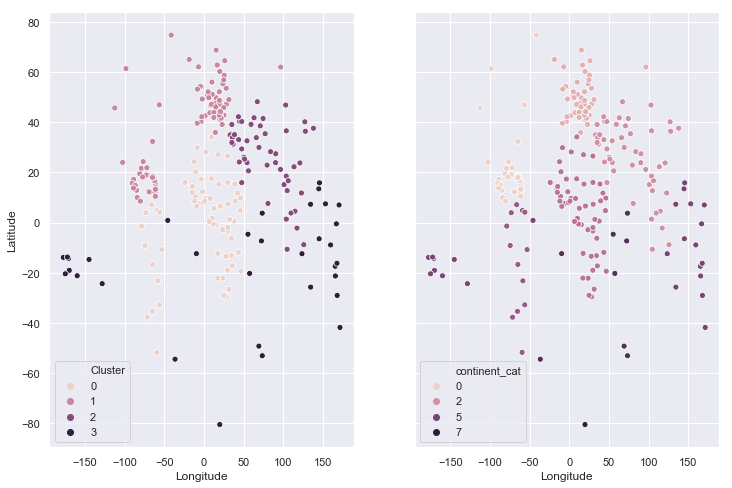

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8), sharey=True )
sns.scatterplot(data=df, x='Longitude',y='Latitude',hue='Cluster',cmap='Paired',ax=ax1)
sns.scatterplot(data=df, x='Longitude',y='Latitude',hue='continent_cat',cmap='Paired',ax=ax2)

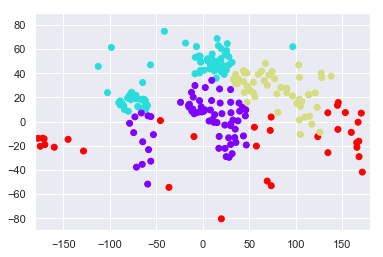

In [12]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

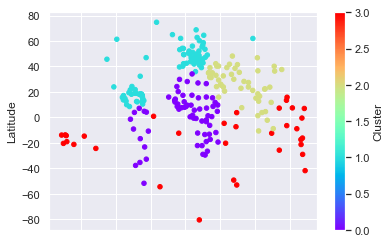

In [13]:
df.plot(kind='scatter',x='Longitude',y='Latitude',c='Cluster',cmap='rainbow')

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

In [14]:
df.head()

,name,Longitude,Latitude,continent,continent_cat,Cluster
0,Aruba,-69.98,12.52,North America,0,1
1,Afghanistan,66.00,33.84,Asia,2,2
2,Angola,17.54,-12.29,Africa,3,0
3,Anguilla,-63.06,18.22,North America,0,1
4,Albania,20.05,41.14,Europe,1,1


In [15]:
df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
print(df2.head())

          COUNTRY  GDP (BILLIONS) CODE
0     Afghanistan           21.71  AFG
1         Albania           13.40  ALB
2         Algeria          227.80  DZA
3  American Samoa            0.75  ASM
4         Andorra            4.80  AND


In [16]:
df = pd.merge(df, df2, how='left', left_on='name', right_on='COUNTRY')
df.head()

,name,Longitude,Latitude,continent,continent_cat,Cluster,COUNTRY,GDP (BILLIONS),CODE
0,Aruba,-69.98,12.52,North America,0,1,Aruba,2.52,ABW
1,Afghanistan,66.00,33.84,Asia,2,2,Afghanistan,21.71,AFG
2,Angola,17.54,-12.29,Africa,3,0,Angola,131.40,AGO
3,Anguilla,-63.06,18.22,North America,0,1,Anguilla,0.18,AIA
4,Albania,20.05,41.14,Europe,1,1,Albania,13.40,ALB


In [17]:
df[df['CODE'].isnull()]

,name,Longitude,Latitude,continent,continent_cat,Cluster,COUNTRY,GDP (BILLIONS),CODE
5,Aland,19.95,60.21,Europe,1,1,NaN,nan,NaN
11,Antarctica,19.92,-80.51,Antarctica,7,3,NaN,nan,NaN
12,Ashmore and Cartier Is.,123.58,-12.43,Oceania,5,3,NaN,nan,NaN
13,Fr. S. Antarctic Lands,69.23,-49.25,Seven seas (open ocean),6,3,NaN,nan,NaN
14,Antigua and Barb.,-61.79,17.28,North America,0,1,NaN,nan,NaN
26,Bahamas,-76.63,24.29,North America,0,1,NaN,nan,NaN
27,Bosnia and Herz.,17.77,44.17,Europe,1,1,NaN,nan,NaN
28,St-BarthÃ©lemy,-62.84,17.90,North America,0,1,NaN,nan,NaN
38,Central African Rep.,20.47,6.57,Africa,3,0,NaN,nan,NaN
42,CÃ´te d'Ivoire,-5.57,7.63,Africa,3,0,NaN,nan,NaN


In [18]:
df.head()

,name,Longitude,Latitude,continent,continent_cat,Cluster,COUNTRY,GDP (BILLIONS),CODE
0,Aruba,-69.98,12.52,North America,0,1,Aruba,2.52,ABW
1,Afghanistan,66.00,33.84,Asia,2,2,Afghanistan,21.71,AFG
2,Angola,17.54,-12.29,Africa,3,0,Angola,131.40,AGO
3,Anguilla,-63.06,18.22,North America,0,1,Anguilla,0.18,AIA
4,Albania,20.05,41.14,Europe,1,1,Albania,13.40,ALB


In [19]:
import plotly.plotly as py
import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['Cluster'],
        text = df['name'],
        autocolorscale= True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Continent'),
      ) ]

layout = dict(
    title = 'Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

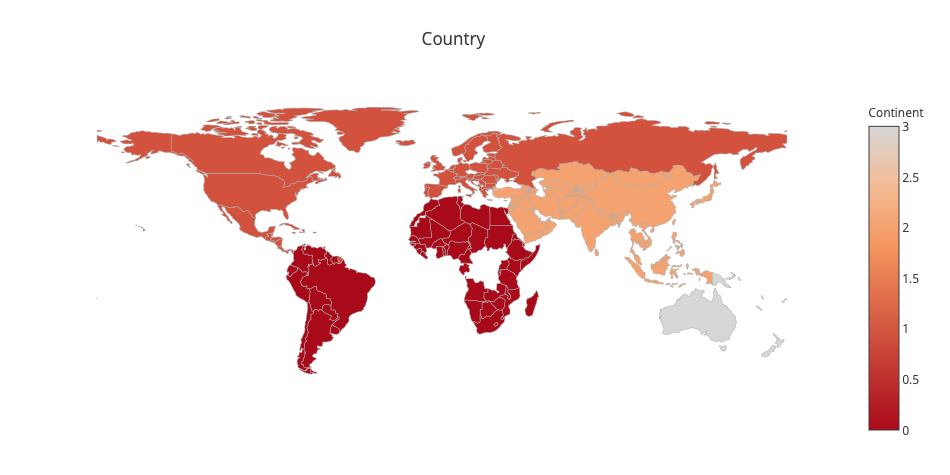

In [20]:
Image(filename=('../data/snapshots/cluster_country_map.png'),width=1000)